In [1]:
#import the following libraries the lab
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [16]:
#read the SpaceX dataset into a Pandas dataframe and print its summary.I saved the file in the computer and call it from there
df=pd.read_csv(r"C:\Users\dcalvoar\OneDrive - Intel Corporation\Documents\Internal Audit\Digital\Cohort\daniel\Capstone/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,6/4/2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,9/29/2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0


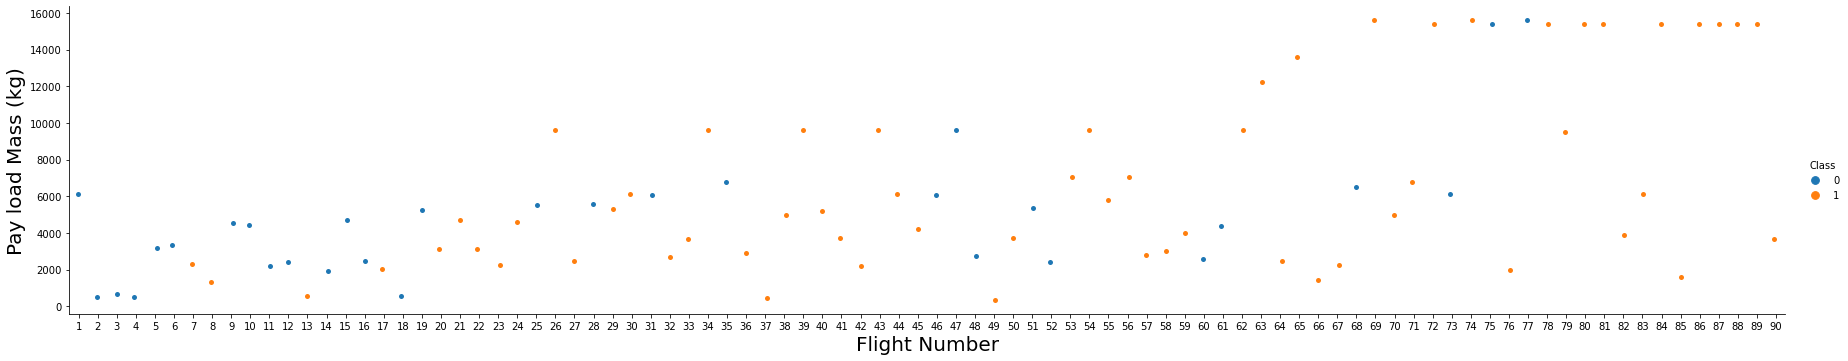

In [17]:
#lot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()


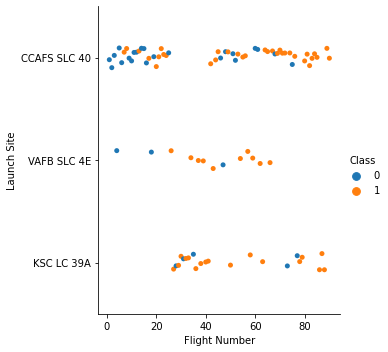

In [18]:
#let's drill down to each site visualize its detailed launch records

##TASK 1: Visualize the relationship between Flight Number and Launch Site

#function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data=df)
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()

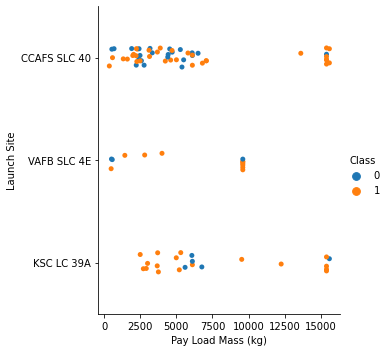

In [19]:
##TASK 2: Visualize the relationship between Payload and Launch Site

# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='PayloadMass', hue='Class', data=df)
plt.xlabel('Pay Load Mass (kg)')
plt.ylabel('Launch Site')
plt.show()


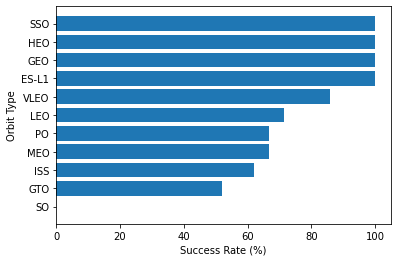

In [20]:
#for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

##TASK 3: Visualize the relationship between success rate of each orbit type
# check if there are any relationship between success rate and orbit type.
#create a bar chart for the sucess rate of each orbit

# HINT use groupby method on Orbit column and get the mean of Class column
df_sorted = df.groupby('Orbit').mean()['Class'].reset_index().sort_values(['Class'], ascending=True)

fig, ax = plt.subplots()

ax.barh(df_sorted.Orbit, df_sorted.Class * 100)

plt.xlabel('Success Rate (%)')
plt.ylabel('Orbit Type')
plt.show()

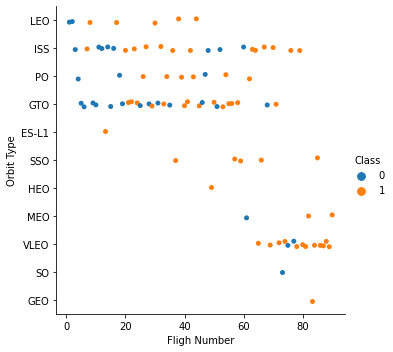

In [21]:
##TASK 4: Visualize the relationship between FlightNumber and Orbit type

#For each orbit, see if there is any relationship between FlightNumber and Orbit type.

# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='FlightNumber', y='Orbit', hue='Class', data=df)
plt.xlabel('Fligh Number')
plt.ylabel('Orbit Type')
plt.show()

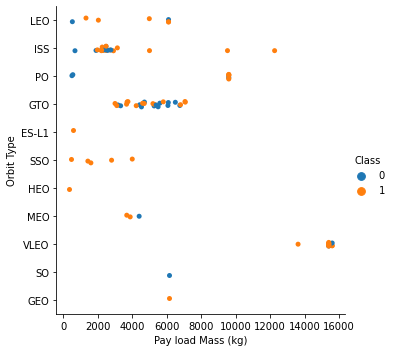

In [22]:
##TASK 5: Visualize the relationship between Payload and Orbit type

#plot the Payload vs. Orbit scatter point charts to review the relationship between Payload and Orbit type

# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='PayloadMass', y='Orbit', hue='Class', data=df)
plt.xlabel('Pay load Mass (kg)')
plt.ylabel('Orbit Type')
plt.show()

In [28]:
##TASK 6: Visualize the launch success yearly trend


# plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.
# Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

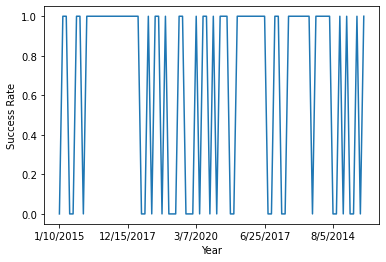

In [29]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df.groupby(Extract_year(df['Date'])).mean()['Class'].plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()

In [30]:
##Features Engineering

#obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()


,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1,0,B1004


In [31]:
##TASK 7: Create dummy variables to categorical columns

#apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
##TASK 8: Cast all numeric columns to float64

#cast the entire dataframe to variable type float64
# HINT: use astype function
features_one_hot.astype('float64')

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
#We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.
features_one_hot.to_csv(r'C:\Users\dcalvoar\OneDrive - Intel Corporation\Documents\Internal Audit\Digital\Cohort\daniel\Capstone\_3.csv', index=False)